In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

**Linear Regression using Formula**

In [ ]:
df_sal = pd.read_csv('Salary_Data.csv')
df_sal.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
def estimate_coef(x, y):
# number of observations/points
  n = np.size(x)
  m_x = np.mean(x)
  m_y = np.mean(y)

  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return (b_0, b_1)


In [ ]:
def plot_regression_line(x, y, b):
  plt.scatter(x, y, color = "m",
      marker = "o", s = 30)
  y_pred = b[0] + b[1]*x

  plt.plot(x, y_pred, color = "g")

  plt.xlabel('x')
  plt.ylabel('y')


In [ ]:
x = np.array(df_sal["YearsExperience"])
y = np.array(df_sal["Salary"])

b = estimate_coef(x, y)
print("Estimated coefficents"+str(b[0])+"and"+str(b[1]))
inp = int(input("Enter the Year of Experience to predict the Salary "))
out = b[0] + b[1]*inp
print("Estimated Salary is "+str(out))

Estimated coefficents25792.200198668717and9449.962321455072
Enter the Year of Experience to predict the Salary 4
Estimated Salary is 63592.049484489005


**Simple Linear Regression(Sklearn model)**

In [ ]:
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train


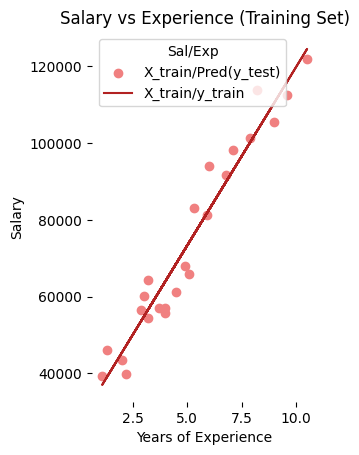

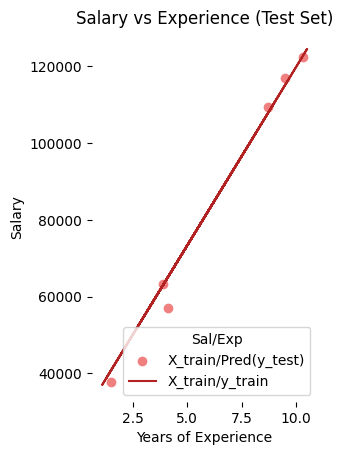

In [ ]:
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]
